
🌏 INDIAN WEATHER FORECAST SYSTEM
1. View city weather details
2. Compare multiple cities
3. Exit

Select option (1-3): 1

Available Cities:
1. Delhi
2. Mumbai
3. Bangalore
4. Chennai
5. Kolkata
6. Hyderabad
7. Pune
8. Jaipur

Select city: 1

🌦️ DELHI WEATHER FORECAST

📅 DAILY SUMMARY:
            temp             humidity  rain wind_speed
            mean   min   max     mean   sum       mean
datetime                                              
2025-08-04  29.8  29.6  30.0     71.5   0.8        1.1
2025-08-05  26.6  25.7  28.2     83.8  33.0        2.5
2025-08-06  27.1  25.3  28.9     77.1   5.5        2.6
2025-08-07  33.7  28.3  37.8     46.8   0.0        3.6


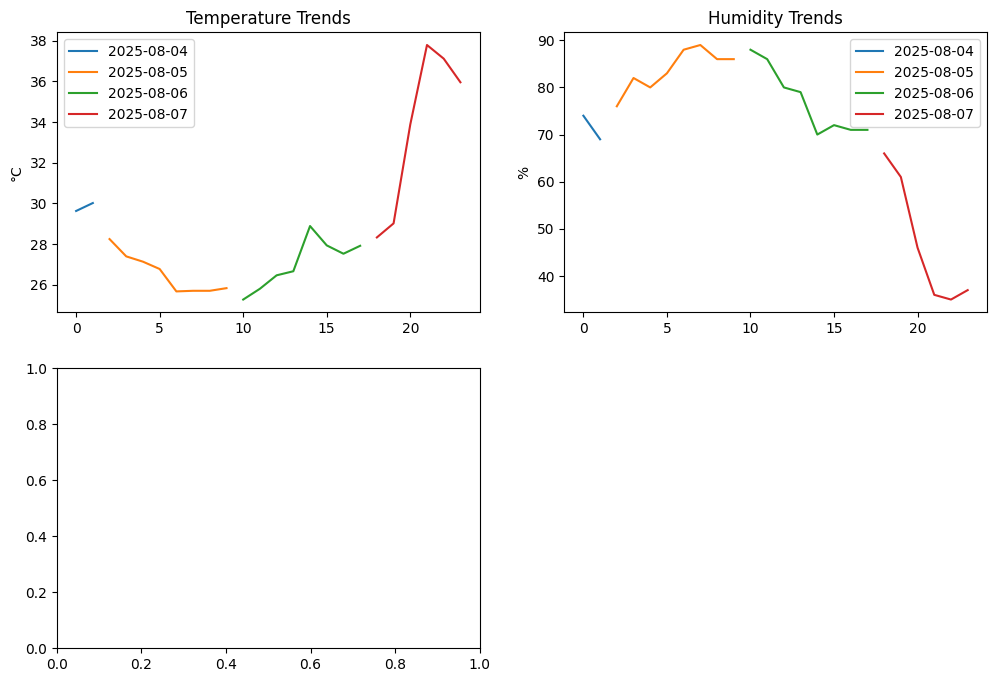

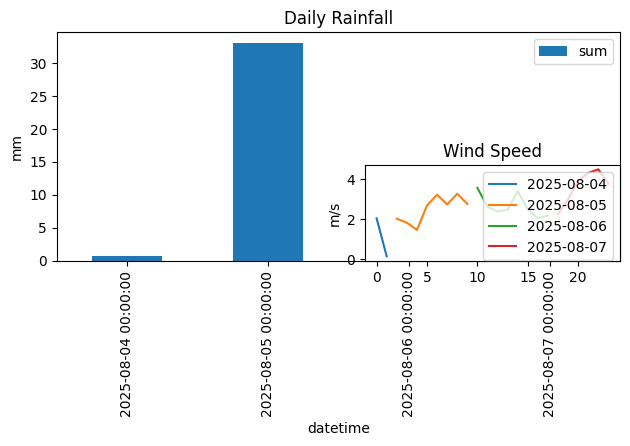


🌏 INDIAN WEATHER FORECAST SYSTEM
1. View city weather details
2. Compare multiple cities
3. Exit

Select option (1-3): 2

🇮🇳 INDIAN CITIES WEATHER COMPARISON

Available Cities:
1. Delhi
2. Mumbai
3. Bangalore
4. Chennai
5. Kolkata
6. Hyderabad
7. Pune
8. Jaipur

Select cities (comma separated numbers): 1, 2
Forecast days (1-7): 4


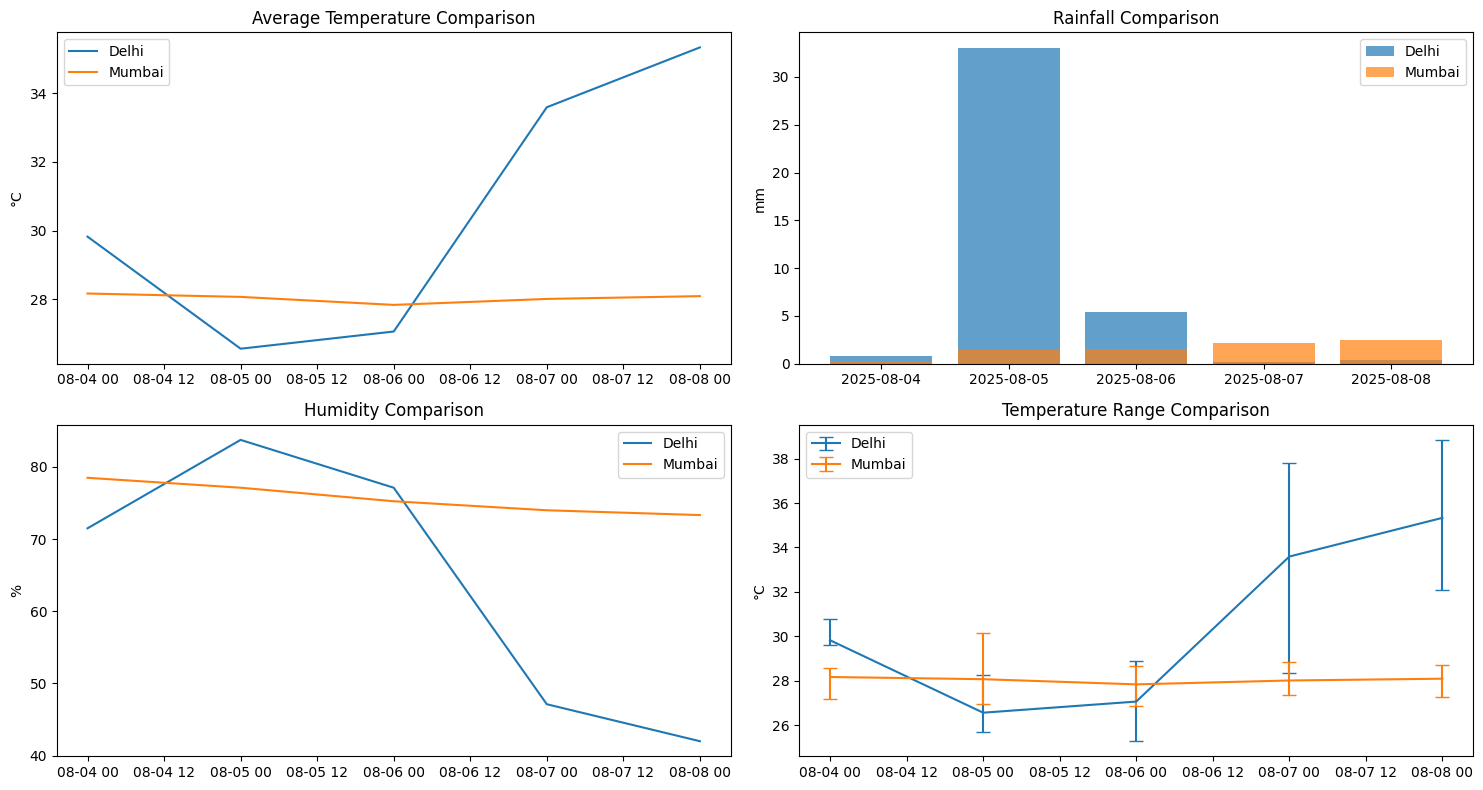


🌏 INDIAN WEATHER FORECAST SYSTEM
1. View city weather details
2. Compare multiple cities
3. Exit

Select option (1-3): 3
Exiting...


In [ ]:
# Install required libraries
!pip install requests folium pandas matplotlib

import requests
import folium
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Configuration
OPENWEATHER_API_KEY = "******************************"  # Your API key

# Indian cities with coordinates
INDIAN_CITIES = {
    "Delhi": {"lat": 28.6139, "lon": 77.2090},
    "Mumbai": {"lat": 19.0760, "lon": 72.8777},
    "Bangalore": {"lat": 12.9716, "lon": 77.5946},
    "Chennai": {"lat": 13.0827, "lon": 80.2707},
    "Kolkata": {"lat": 22.5726, "lon": 88.3639},
    "Hyderabad": {"lat": 17.3850, "lon": 78.4867},
    "Pune": {"lat": 18.5204, "lon": 73.8567},
    "Jaipur": {"lat": 26.9124, "lon": 75.7873}
}

def get_weather_forecast(city_name, forecast_days=1):
    """Get detailed weather forecast for an Indian city"""
    try:
        url = f"https://api.openweathermap.org/data/2.5/forecast?lat={INDIAN_CITIES[city_name]['lat']}&lon={INDIAN_CITIES[city_name]['lon']}&appid={OPENWEATHER_API_KEY}&units=metric"
        response = requests.get(url, timeout=10).json()

        forecast_data = []
        for item in response['list'][:forecast_days*8]:  # 3-hour intervals
            forecast_data.append({
                "datetime": datetime.fromtimestamp(item['dt']),
                "temp": item['main']['temp'],
                "temp_min": item['main']['temp_min'],
                "temp_max": item['main']['temp_max'],
                "humidity": item['main']['humidity'],
                "pressure": item['main']['pressure'],
                "wind_speed": item['wind']['speed'],
                "rain": item.get('rain', {}).get('3h', 0),
                "description": item['weather'][0]['description']
            })

        return pd.DataFrame(forecast_data)

    except Exception as e:
        print(f"⚠️ Error fetching data for {city_name}: {str(e)}")
        return None

def display_city_weather(city_name, forecast_days=3):
    """Display comprehensive weather information for a city"""
    print(f"\n{'='*50}\n🌦️ {city_name.upper()} WEATHER FORECAST\n{'='*50}")

    weather_df = get_weather_forecast(city_name, forecast_days)
    if weather_df is None:
        print("Failed to fetch weather data")
        return

    # Daily summary
    daily_df = weather_df.resample('D', on='datetime').agg({
        'temp': ['mean', 'min', 'max'],
        'humidity': 'mean',
        'rain': 'sum',
        'wind_speed': 'mean'
    })

    print("\n📅 DAILY SUMMARY:")
    print(daily_df.round(1))

    # Plotting
    plt.figure(figsize=(12, 8))

    # Temperature plot
    plt.subplot(2, 2, 1)
    weather_df.groupby(weather_df['datetime'].dt.date)['temp'].plot(legend=True)
    plt.title("Temperature Trends")
    plt.ylabel("°C")

    # Humidity plot
    plt.subplot(2, 2, 2)
    weather_df.groupby(weather_df['datetime'].dt.date)['humidity'].plot(legend=True)
    plt.title("Humidity Trends")
    plt.ylabel("%")

    # Rainfall plot
    plt.subplot(2, 2, 3)
    daily_df['rain'].plot(kind='bar')
    plt.title("Daily Rainfall")
    plt.ylabel("mm")

    # Wind plot
    plt.subplot(2, 2, 4)
    weather_df.groupby(weather_df['datetime'].dt.date)['wind_speed'].plot(legend=True)
    plt.title("Wind Speed")
    plt.ylabel("m/s")

    plt.tight_layout()
    plt.show()

    # Create map
    m = folium.Map(location=[INDIAN_CITIES[city_name]['lat'], INDIAN_CITIES[city_name]['lon']], zoom_start=10)
    folium.Marker(
        [INDIAN_CITIES[city_name]['lat'], INDIAN_CITIES[city_name]['lon']],
        popup=f"<b>{city_name}</b><br>Avg Temp: {daily_df['temp']['mean'].mean():.1f}°C",
        icon=folium.Icon(color='red')
    ).add_to(m)

    # Add weather layer
    folium.TileLayer(
        tiles=f"https://tile.openweathermap.org/map/precipitation_new/{{z}}/{{x}}/{{y}}.png?appid={OPENWEATHER_API_KEY}",
        attr='OpenWeatherMap',
        name='Precipitation'
    ).add_to(m)

    folium.LayerControl().add_to(m)
    display(m)

def compare_cities():
    """Compare weather across multiple Indian cities"""
    print("\n" + "="*50)
    print("🇮🇳 INDIAN CITIES WEATHER COMPARISON")
    print("="*50)

    print("\nAvailable Cities:")
    for i, city in enumerate(INDIAN_CITIES.keys(), 1):
        print(f"{i}. {city}")

    selected = input("\nSelect cities (comma separated numbers): ")
    selected_cities = [list(INDIAN_CITIES.keys())[int(i)-1] for i in selected.split(",")]
    forecast_days = min(7, max(1, int(input("Forecast days (1-7): "))))

    comparison_data = []
    for city in selected_cities:
        df = get_weather_forecast(city, forecast_days)
        if df is not None:
            daily_df = df.resample('D', on='datetime').agg({
                'temp': 'mean',
                'temp_min': 'min',
                'temp_max': 'max',
                'humidity': 'mean',
                'rain': 'sum'
            })
            comparison_data.append(daily_df.assign(City=city))

    if comparison_data:
        result_df = pd.concat(comparison_data)

        # Plot comparison
        plt.figure(figsize=(15, 8))

        # Temperature comparison
        plt.subplot(2, 2, 1)
        for city in selected_cities:
            city_data = result_df[result_df['City'] == city]
            plt.plot(city_data.index, city_data['temp'], label=city)
        plt.title("Average Temperature Comparison")
        plt.ylabel("°C")
        plt.legend()

        # Rainfall comparison
        plt.subplot(2, 2, 2)
        for city in selected_cities:
            city_data = result_df[result_df['City'] == city]
            plt.bar(city_data.index, city_data['rain'], label=city, alpha=0.7)
        plt.title("Rainfall Comparison")
        plt.ylabel("mm")
        plt.legend()

        # Humidity comparison
        plt.subplot(2, 2, 3)
        for city in selected_cities:
            city_data = result_df[result_df['City'] == city]
            plt.plot(city_data.index, city_data['humidity'], label=city)
        plt.title("Humidity Comparison")
        plt.ylabel("%")
        plt.legend()

        # Min/Max temp comparison
        plt.subplot(2, 2, 4)
        for city in selected_cities:
            city_data = result_df[result_df['City'] == city]
            plt.errorbar(city_data.index, city_data['temp'],
                        yerr=[city_data['temp']-city_data['temp_min'],
                              city_data['temp_max']-city_data['temp']],
                        label=city, capsize=5)
        plt.title("Temperature Range Comparison")
        plt.ylabel("°C")
        plt.legend()

        plt.tight_layout()
        plt.show()

# Main menu
def main():
    while True:
        print("\n" + "="*50)
        print("🌏 INDIAN WEATHER FORECAST SYSTEM")
        print("="*50)
        print("1. View city weather details")
        print("2. Compare multiple cities")
        print("3. Exit")

        choice = input("\nSelect option (1-3): ")

        if choice == "1":
            print("\nAvailable Cities:")
            for i, city in enumerate(INDIAN_CITIES.keys(), 1):
                print(f"{i}. {city}")
            city_choice = int(input("\nSelect city: ")) - 1
            city_name = list(INDIAN_CITIES.keys())[city_choice]
            display_city_weather(city_name)

        elif choice == "2":
            compare_cities()

        elif choice == "3":
            print("Exiting...")
            break

        else:
            print("Invalid choice. Try again.")

# Run the program
main()